### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_datareader as web
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Importing the Data

In [2]:
#Start date and end date of out data
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

In [3]:
company =  "FB"
data = web.DataReader(company,'yahoo', start, end)

## Data Preprocessing

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [5]:
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Text(0.5, 1.0, 'Company Close Price history')

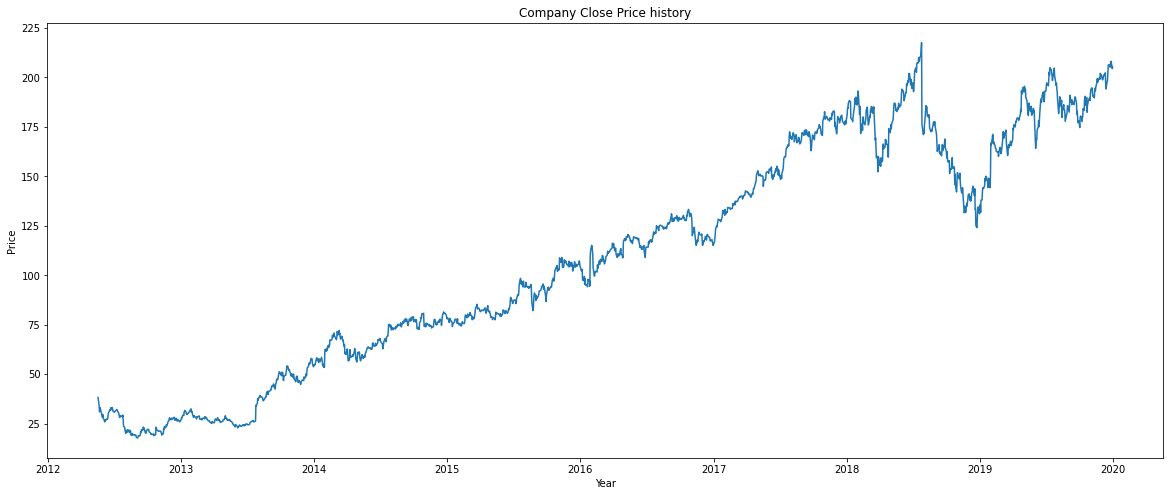

In [6]:
plt.figure(figsize=(20,8))
plt.plot(data["Close"])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title("Company Close Price history")

In [7]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [8]:
scaled_data

array([[0.10261801],
       [0.08159383],
       [0.06642639],
       ...,
       [0.95294592],
       [0.93447466],
       [0.93867948]])

In [71]:
prediction_days = 60

In [10]:
x_train, y_train = [], []
for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

In [11]:
print(x_train)

[array([0.10261801, 0.08159383, 0.06642639, 0.07143215, 0.07658807,
       0.07098163, 0.05561396, 0.05236022, 0.05941834, 0.05000751,
       0.04590279, 0.04074687, 0.04545227, 0.04294939, 0.04690394,
       0.04645342, 0.04840567, 0.04775492, 0.0528608 , 0.06147069,
       0.06847875, 0.07098163, 0.06942985, 0.07063123, 0.07668819,
       0.0717325 , 0.07693847, 0.07258347, 0.06822847, 0.06692697,
       0.06527507, 0.06742755, 0.06877909, 0.07008059, 0.07228312,
       0.06877909, 0.06627622, 0.0654753 , 0.06502478, 0.05266056,
       0.05185964, 0.05696552, 0.05641488, 0.0552135 , 0.05516344,
       0.05366172, 0.05811684, 0.0456525 , 0.02993442, 0.0271312 ,
       0.01992291, 0.01576813, 0.0115633 , 0.01681935, 0.02097412,
       0.01496721, 0.01496721, 0.01641889, 0.02042349, 0.01937228]), array([0.08159383, 0.06642639, 0.07143215, 0.07658807, 0.07098163,
       0.05561396, 0.05236022, 0.05941834, 0.05000751, 0.04590279,
       0.04074687, 0.04545227, 0.04294939, 0.04690394, 0.04

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train.shape

(1857, 60)

In [14]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

## Building the CNN

In [15]:
ann = Sequential()
ann.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
ann.add(Dropout(0.2))
ann.add(LSTM(units=50, return_sequences=True))
ann.add(Dropout(0.2))
ann.add(LSTM(units=50))
ann.add(Dropout(0.2))
ann.add(Dense(units=1))
ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(x_train, y_train, epochs =25, batch_size=32)

Epoch 1/25
59/59 [==============================] - 10s 78ms/step - loss: 0.0864
Epoch 2/25
59/59 [==============================] - 5s 83ms/step - loss: 0.0041
Epoch 3/25
59/59 [==============================] - 5s 81ms/step - loss: 0.0038
Epoch 4/25
59/59 [==============================] - 5s 81ms/step - loss: 0.0035
Epoch 5/25
59/59 [==============================] - 5s 81ms/step - loss: 0.0037
Epoch 6/25
59/59 [==============================] - 5s 82ms/step - loss: 0.0031
Epoch 7/25
59/59 [==============================] - 5s 80ms/step - loss: 0.0029
Epoch 8/25
59/59 [==============================] - 5s 81ms/step - loss: 0.0031
Epoch 9/25
59/59 [==============================] - 5s 80ms/step - loss: 0.0031
Epoch 10/25
59/59 [==============================] - 5s 79ms/step - loss: 0.0032
Epoch 11/25
59/59 [==============================] - 5s 79ms/step - loss: 0.0032
Epoch 12/25
59/59 [==============================] - 5s 80ms/step - loss: 0.0027
Epoch 13/25
59/59 [=================

## Testing the model

### Importing  test data

In [17]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [18]:
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

### Preprocessing test Data

In [19]:
actual_price = test_data['Close'].values

In [20]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis = 0)

In [21]:
data["Close"].shape

(1917,)

In [22]:
test_data["Close"].shape

(316,)

In [23]:
total_dataset.shape

(2233,)

In [24]:
model_input = total_dataset[len(total_dataset) - len(test_data) - prediction_days :].values

In [25]:
model_input

array([179.67999268, 177.75      , 179.8500061 , 180.02999878,
       184.19000244, 183.27999878, 188.88999939, 189.55000305,
       190.38999939, 185.8500061 , 189.75999451, 182.33999634,
       186.1499939 , 186.38000488, 187.88999939, 189.3999939 ,
       189.30999756, 188.25      , 191.6499939 , 193.61999512,
       194.72000122, 194.32000732, 191.55000305, 190.41999817,
       190.83999634, 189.61000061, 194.47000122, 193.19000244,
       193.1499939 , 195.1000061 , 197.3999939 , 199.32000732,
       197.50999451, 197.92999268, 198.82000732, 199.78999329,
       198.97000122, 202.        , 201.63999939, 199.69999695,
       198.82000732, 198.71000671, 199.36000061, 201.05000305,
       201.33999634, 200.86999512, 202.25999451, 196.75      ,
       194.11000061, 197.91999817, 198.38999939, 202.5       ,
       206.05999756, 206.30000305, 206.17999268, 205.11999512,
       207.78999329, 208.1000061 , 204.41000366, 205.25      ,
       209.77999878, 208.66999817, 212.6000061 , 213.05

In [26]:
model_input = total_dataset[len(data['Close'])- prediction_days :].values

In [27]:
model_input = model_input.reshape(-1,1)

In [28]:
model_input  = scaler.transform(model_input)

In [29]:
x_test = []
for x in range(prediction_days, len(model_input)):
  x_test.append(model_input[x-prediction_days:x,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

### Predicting

In [30]:
predicted_price = ann.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

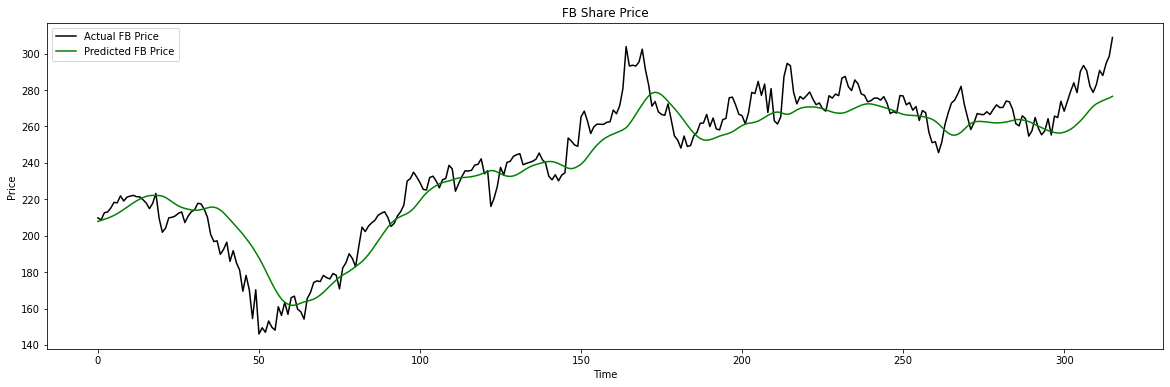

In [32]:
plt.figure(figsize=(20,6))
plt.plot(actual_price, color = 'black', label = f'Actual {company} Price')
plt.plot(predicted_price, color = 'green', label = f'Predicted {company} Price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Predict the next day Price

In [59]:
real_data = [model_input[len(model_input) +1 - prediction_days:len(model_input+1),0]]

In [60]:
real_data = np.array(real_data)

In [61]:
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

In [58]:
prediction = ann.predict(real_data)

In [63]:
prediction = scaler.inverse_transform(prediction)

In [77]:
print(f"Predicted Closing Stock price of {company} on {dt.date.today() + dt.timedelta(days=1)} is : {prediction[0][0]} Rs")

Predicted Closing Stock price of FB on 2021-04-07 is : 277.91754150390625 Rs
